<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Shane Bechtel</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2024</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 9

## Problem 1

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
from scipy import optimize
import matplotlib.pyplot as plt

In lecture, we have introduced how to sample from an arbitrary distribution using a change of variables. 

Consider the probability distribution:
\begin{equation}
  P(y) =
    \begin{cases}
      \frac{3}{2} \sqrt{y} & 0 \leq y \leq 1 \\
      0 & otherwise
    \end{cases}       
\end{equation}

$\frac{3}{2}\sqrt{y}$ is not a probability distribution that we can sample using ```numpy.random```, but as we have seen in lecture, we can sample from a uniform distribution: $P(x)=U(x)$, using ```numpy.random.uniform```, and find a function $y(x)$ which allows us to transform $P(x)$ to the desired distribution via $P(y) = P(x)|\frac{dx}{dy}|$.

(a) Find the function y(x) that transforms uniform probability distribution to P(y) (No coding for this problem).

(b) Check that your transformation function accurately reflects your desired probability density. Sample 1000000 numbers from a uniform distribution and compare their histogram to P(y) 

$$

P(y) = P(x) \mid\frac{dx}{dy}\mid \\

since y is also positive on x occur in the problem \\

P(y) = P(x) \frac{dx}{dy} \\

P(y) dy = P(x) dx \\

since we difence P(x) to be uniform ditribution over 0 to 1, we have\\

x = \int^{y}_{0} P(y) dy\\

x = y^{\frac{3}{2}}


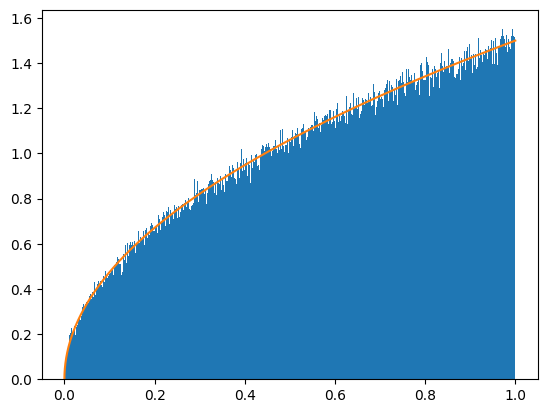

In [8]:
x = np.random.uniform(0,1,1000000)

y = x**(2/3)

plt.hist(y,1000,density=True)

x = np.linspace(0,1,1000000)
y = 3/2*np.sqrt(x)

plt.plot(x,y)

## Problem 2

The file data/Cobe.txt contains data from the COBE satellite. It shows the spectrum of the cosmic microwave background. The first column gives the frequency (actually the inverse of the wavelength in $cm^{-1} units), the second column the spectrum in MJy/sr (MJy: Mega-Jansky, 1 Jy= W/Hz m2 ; sr: Steradian), so it is a measure of the spectral flux per solid angle (intensity). The third column shows the uncertainty on the spectrum in kJy/sr.

(a) Load the data via Numpy's loadtxt function and make a scatter plot of intensity vs frequency. Please include error bars on the intensities, and note that the data file gives the uncertainties (3rd column) in kJy/sr, which is 0.001 Mjy/sr.

(b) The function describing the data is the black body radiation spectrum:
$$
f(x) = \frac{A_0 x^3}{exp(1.439x/T) - 1}
$$
where x is the frequency in units of $cm^{-1}$, $A_0$ and T are the fit parameters. $A_0$ is the amplitude and T the temperature of the universe.
Overplot this function on top of the data, and try testing different values for $A_0$ and T until the function roughly matches the data points. (A very rough match is fine here, we will do the exact fit in part c, we just need a sensible initial guess. Remember the current universe is really cold compared to Earth, so try very low tempertures in Kelvin.)

(c) Now use ```scipy.optimize.curve_fit to perform``` a fit to the data. You can use your estimate from part b as initial guesses. Determine from the fit how hot the universe is. 

<ErrorbarContainer object of 3 artists>

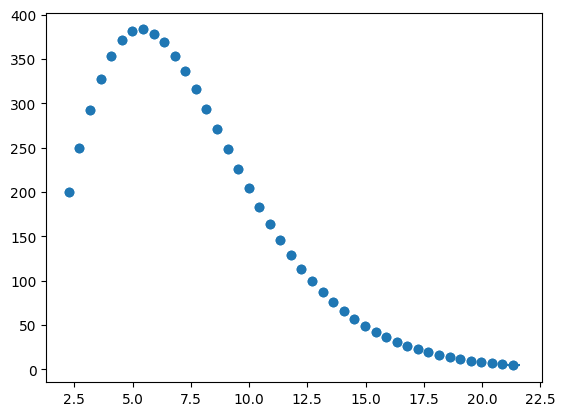

In [22]:
File = np.loadtxt('Cobe.txt')
Frequency = File[:,0]
Spectrum = File[:,1]
UncertaintyOfSpectrum = File[:,2]

plt.scatter(Frequency,Spectrum,)
plt.errorbar(Frequency,Spectrum,xerr=UncertaintyOfSpectrum*0.001,fmt='o')